Dataset Used: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting?resource=download

Business Goal: The objective of this project is to utilize the unfamiliar dataset to create a sales forecasting model, which predicts sales at the store level. By doing so, business insights will be quickly learned to optimize sales performance. Leadership can use this information to ensure inventory levels are stocked appropriately and improve efficiency. Management can make more informed decisions when purchasing supplies and determining staffing needs. This will improve increase revenue and reduce loss.

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import matplotlib.ticker as mticker

#Import Dataset
data_path = Path("..") / "data" / "data_raw" / "train.csv" 
#This creates a relative path, allowing visibility for github viewers when downloaded.
df = pd.read_csv(data_path)

#Check data load
print(f"Shape: {df.shape}")
df.head()



Shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
#Review Dataset
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

There are 9,800 rows in this dataset including categorical and numeric data. The columns consist of customer and order details, as well as location and product information. 

Key columns identified: 
Row ID: Unique Identifier for order
Order ID: Unique Identifier for order
Order Date: Date order was placed
Ship Date: Date order was shipped
Customer ID: Unique customer identifier


In [3]:
#Review Dataset
display(df.describe()) #view descriptive statistics

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


The high standard deviation of $626 is notable, this indicates wide range of sale prices.
Postal code is missing values

In [4]:
#Check missing values
print("Missing Column Values:")
print(df.isnull().sum())


Missing Column Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [5]:
#Clean Dates
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Order Date']).sort_values('Order Date')

# Use a DatetimeIndex for resampling
monthly_sales = (
    df.set_index('Order Date')
      .resample('M')['Sales']
      .sum()
)

#Assign moving average variable (3 months)
ma3 = monthly_sales.rolling(window=3, min_periods=1).mean()


C:\Users\Jaime\AppData\Local\Temp\ipykernel_8124\1992802281.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


C:\Users\Jaime\AppData\Local\Temp\ipykernel_8124\2191564681.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


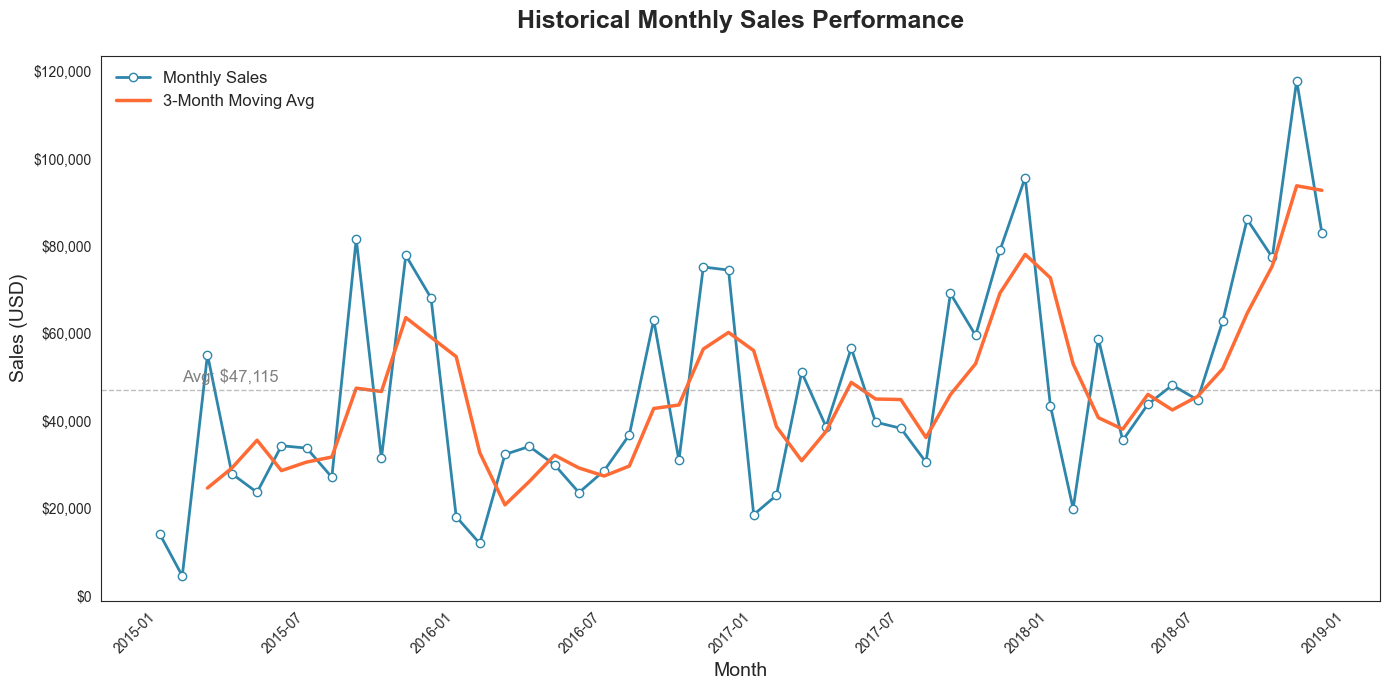

In [6]:
#Sample monthly sales
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

#Remove Gridlines
sns.set_style("white")

#Create figure
plt.figure(figsize=(14, 7))

#Plot main line (Monthly Sales)
plt.plot(
    monthly_sales.index, 
    monthly_sales.values, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    color="#2E86AB", 
    markerfacecolor="white", 
    markeredgecolor="#2E86AB",
    label="Monthly Sales"
)

#Add a rolling 3-month average line for smoother trend
plt.plot(
    monthly_sales.index, 
    monthly_sales.rolling(3).mean(), 
    color="#FF6B35", 
    linewidth=2.5, 
    label="3-Month Moving Avg"
)

#Titles and labels
plt.title("Historical Monthly Sales Performance", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sales (USD)", fontsize=14)

#Format y-axis as currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

#Rotate x-axis labels
plt.xticks(rotation=45)

#Add Legend for both lines
plt.legend(frameon=False, fontsize=12, loc="upper left")

#Add horizontal line at mean
plt.axhline(monthly_sales.mean(), color="gray", linestyle="--", alpha=0.5, linewidth=1)
plt.text(
    monthly_sales.index[1], monthly_sales.mean()+1000, 
    f"Avg: ${monthly_sales.mean():,.0f}", 
    color="gray", fontsize=12, va="bottom"
)

plt.tight_layout()
plt.show()


Historical Monthly Sales Performance (2015–2019)

Looking at the sales data over time, the month-to-month numbers jump around quite a bit, with some very strong spikes that go above $80k and even close to $100k in the later years, and some valleys that dip under $20k, especially early on.

When you smooth things out with a three-month moving average, the overall story becomes clearer: sales in 2015 and 2016 usually sat around the $30k–$40k range, but from 2017 forward the trend rises steadily, moving into the $60k+ territory.

The dashed line at about $47k shows the long-term average. In the early period, sales were often below that line, but as time goes on, more months start landing above it. By 2018, sales are regularly higher than the historical average, which points to steady growth despite the month-to-month swings.

In [8]:
#Further Data Exploration

#Create a dataFrame from the grouped data
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month-Year'] = monthly_sales_df['Order Date'].dt.strftime('%m-%Y')

#Sort sales in descending order, show top 5 perfomring months
top_months = monthly_sales_df.sort_values(by='Sales', ascending=False).head(5)

#Format sales as currency without decimals
top_months['Sales'] = top_months['Sales'].apply(lambda x: f"${x:,.0f}")

#Show the table
from IPython.display import display
display(top_months[['Month-Year', 'Sales']])





,Month-Year,Sales
46,11-2018,"$117,938"
35,12-2017,"$95,739"
44,09-2018,"$86,153"
47,12-2018,"$83,030"
8,09-2015,"$81,624"


2018 was the highest acheiving sales year in the dataset. 
Performance specifically saw a spike during Q4 periods (2017 and 2018) which could potentially be drawn back to a seasonality or promoptional trend.

Peaks are also seen throughout the year, potentially indicating addtional seasonality. 

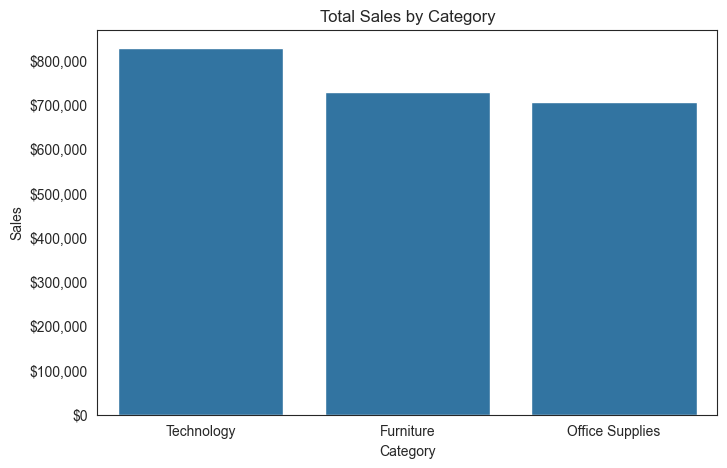

In [9]:
#Sales by Category

#Group sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")

#Format sales as currency without decimals
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


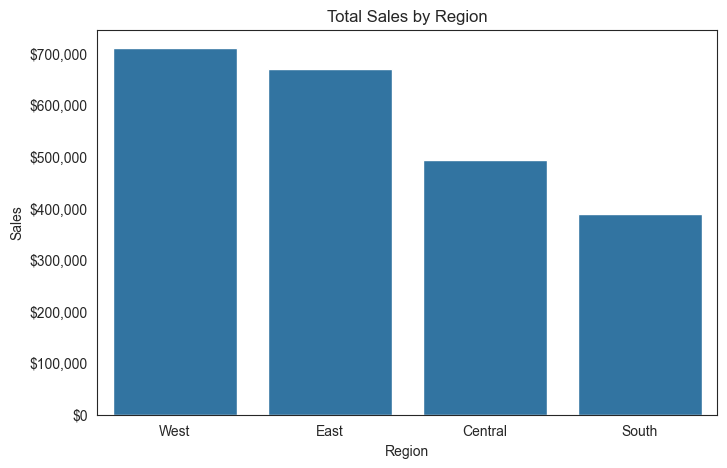

In [10]:
#Sales by Region 

#Group sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.gca().yaxis.set_major_formatter(formatter)  # reuse currency format
plt.show()

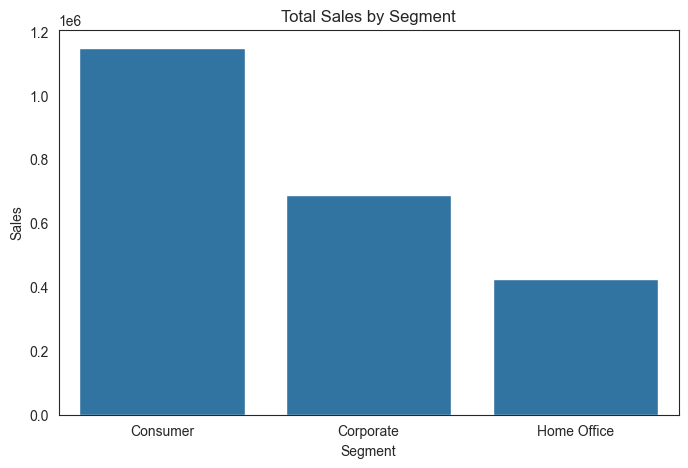

In [11]:
#Sales by Segment

#Group sales by segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Total Sales by Segment")
plt.ylabel("Sales")
plt.xlabel("Segment") 
plt.show()

The vast majority of sales are made by consumers. The West region houses more sales than any other region. Products within the technology category are under greatest demand.

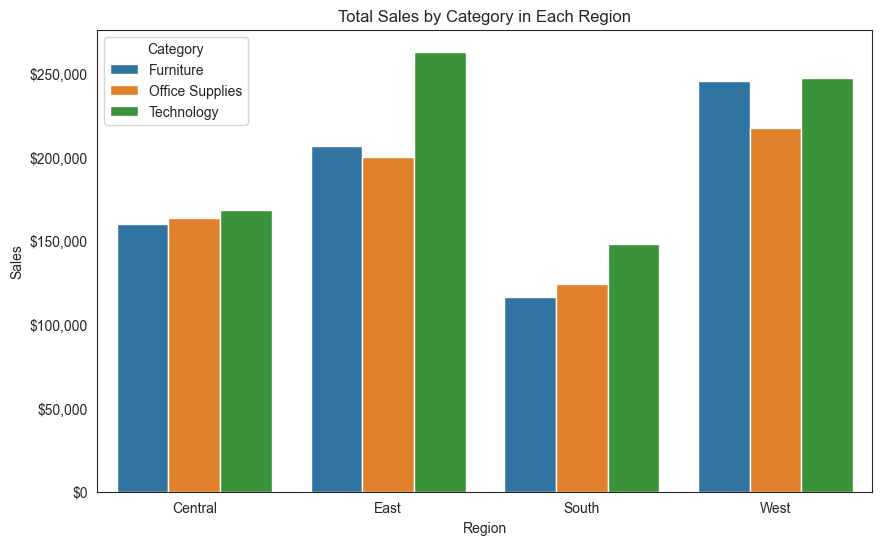

In [12]:
#Category and Region 

#Group sales by category and region
category_region_sales = (
    df.groupby(['Region', 'Category'])['Sales']
    .sum()
    .reset_index()
)

#Plot as grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=category_region_sales,
    x='Region',
    y='Sales',
    hue='Category'
)

#Add titles and labels
plt.title("Total Sales by Category in Each Region")
plt.ylabel("Sales")
plt.xlabel("Region")

#Format sales as currency without decimals
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Category')
plt.show()


Sales patterns differ across regions. In both the East and the South, technology is the leading category, with the East standing out for generating roughly \\$260K in that segment. The West performs well across all three product lines, though furniture edges out the others slightly. Central shows a balanced mix, with each category bringing in between \$160K and \\$170K. By contrast, the South consistently lags behind the other regions, although technology still holds the top spot within that market.


Sub-Category
Phones         $327,782
Chairs         $322,823
Storage        $219,343
Tables         $202,811
Binders        $200,029
Machines       $189,239
Accessories    $164,187
Copiers        $146,248
Bookcases      $113,813
Appliances     $104,618
Furnishings     $89,212
Paper           $76,828
Supplies        $46,420
Art             $26,705
Envelopes       $16,128
Labels          $12,348
Fasteners        $3,002
Name: Sales, dtype: object


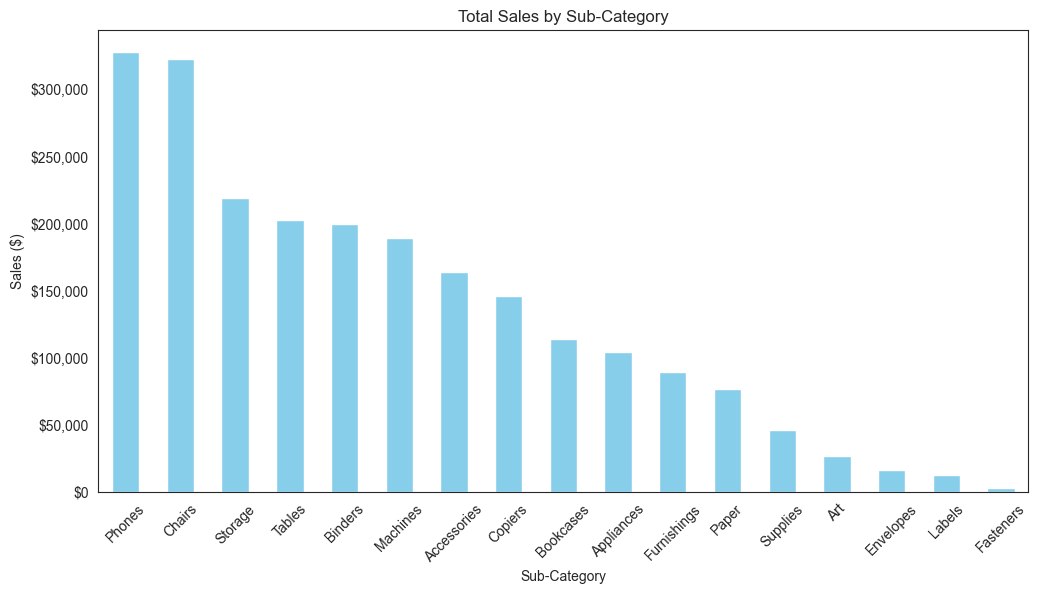

In [13]:
#Sales by sub-category

#Group sales by sub-category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

#Display as a table with currency formatting
subcat_sales_formatted = subcat_sales.apply(lambda x: f"${x:,.0f}")
print(subcat_sales_formatted)

#Plot the results
plt.figure(figsize=(12,6))
ax = subcat_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)

#Format y-axis labels as currency without decimals
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

Phones and Chairs dominate sales, each generating over \\$320K.
Several categories, such as Accessories, Copiers, and Appliances, perform in the mid-\\$100K range.
Lower-earning categories include Labels, Envelopes, and Fasteners, with Fasteners bringing in just $3K.


Top 10 Customers by Sales:
Customer Name
Sean Miller           $25,043
Tamara Chand          $19,052
Raymond Buch          $15,117
Tom Ashbrook          $14,596
Adrian Barton         $14,474
Ken Lonsdale          $14,175
Sanjit Chand          $14,142
Hunter Lopez          $12,873
Sanjit Engle          $12,209
Christopher Conant    $12,129
Name: Sales, dtype: object


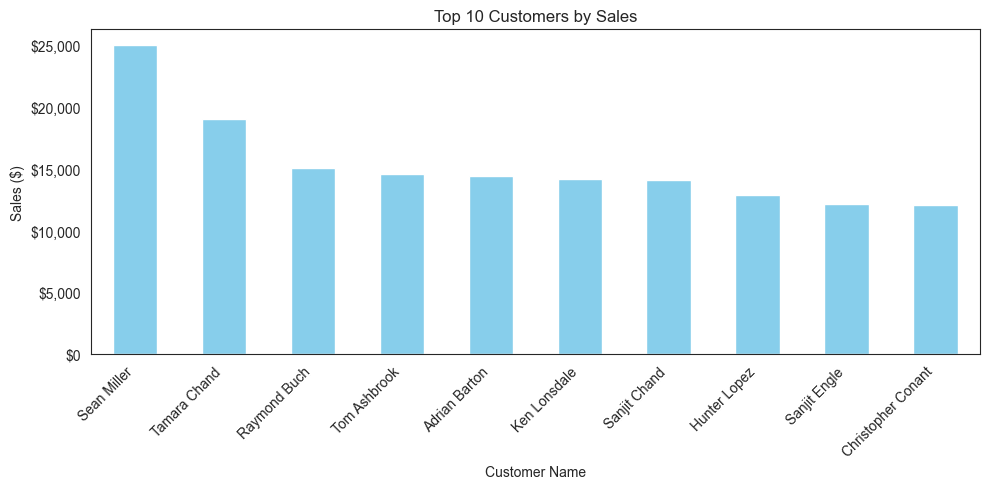

In [14]:
#Top 10 customers

#Group sales by top 10 customers
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

#Create table for top 10 cusomters
top_customers_formatted = top_customers.apply(lambda x: f"${x:,.0f}")
print("Top 10 Customers by Sales:")
print(top_customers_formatted)

#Create chart for top 10 customers
plt.figure(figsize=(10,5))
ax = top_customers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer Name")
plt.ylabel("Sales ($)")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          $61,600
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    $27,453
Cisco TelePresence System EX90 Videoconferencing Unit                          $22,638
HON 5400 Series Task Chairs for Big and Tall                                   $21,871
GBC DocuBind TL300 Electric Binding System                                     $19,823
GBC Ibimaster 500 Manual ProClick Binding System                               $19,024
Hewlett Packard LaserJet 3310 Copier                                           $18,840
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      $18,375
GBC DocuBind P400 Electric Binding System                                      $17,965
High Speed Automatic Electric Letter Opener                                    $17,030
Name: Sales, dtype: object


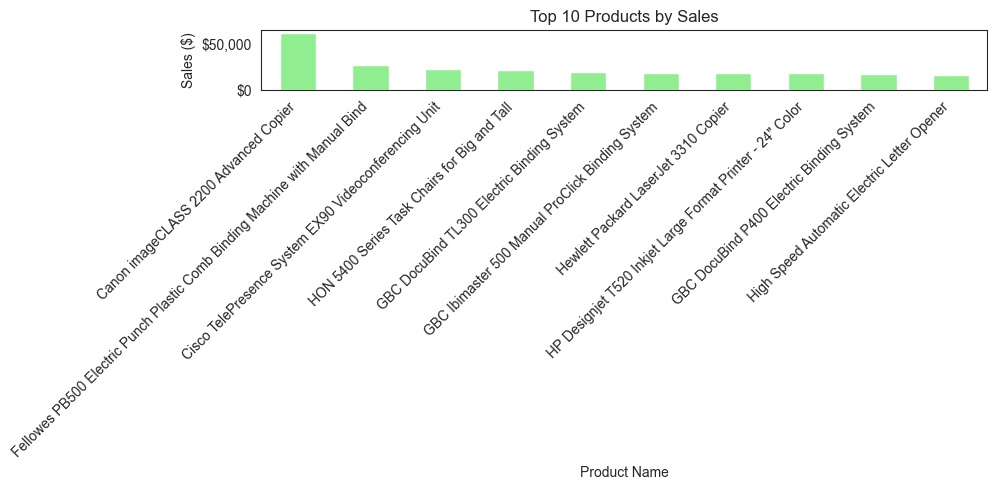

In [15]:
#Top 10 products

#Group sales by top 10 products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

#Create table for top 10 products
top_products_formatted = top_products.apply(lambda x: f"${x:,.0f}")
print("\nTop 10 Products by Sales:")
print(top_products_formatted)

#Create chart for top 10 products
plt.figure(figsize=(10,5))
ax = top_products.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Sales ($)")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


EDA Summary & Insights:
The sales data reveals several notable patterns:

Overall Trends: Sales fluctuate across the year with clear seasonal peaks, particularly in late summer and during the holiday season. Year-over-year comparisons show steady growth in certain months, while others remain flat or decline.

Regional Performance: The East region consistently leads in total sales, especially in Technology products. The West shows strong performance across all categories, while the South trails behind but still sees Technology as its strongest segment.

Category & Sub-Category Insights: Technology drives the highest revenue, followed by Office Supplies and Furniture. Specific sub-categories such as Phones and Chairs are among the top sellers.

Top Customers & Products: A small group of customers accounts for a significant share of revenue, highlighting the importance of maintaining strong relationships with these accounts. Similarly, a handful of products contribute disproportionately to total sales.

Seasonality: The data suggests recurring spikes in certain months each year, which should be considered when planning inventory and promotional campaigns.

Next Steps:
These insights set the stage for forecasting future sales. The seasonality patterns and top product/customer concentrations will be used to build a predictive model that can help optimize stock levels, identify high-priority customers, and better align marketing efforts with peak demand periods.